In [ ]:
Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
Perform a similar alanlaysis as above on this dataset with the following sections:
High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.
Explain our objective.
Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [ ]:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Title: Haberman's Survival Data

Sources:
(a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu)
(b) Date: March 4, 1999

Past Usage:

Haberman, S. J. (1976). Generalized Residuals for Log-Linear
Models, Proceedings of the 9th International Biometrics
Conference, Boston, pp. 104-122.
Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
Graphical Models for Assessing Logistic Regression Models (with
discussion), Journal of the American Statistical Association 79:
61-83.
Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
Department of Statistics, University of Wisconsin, Madison, WI.
Relevant Information:
The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)

Survival status (class attribute)
1 = the patient survived 5 years or longer
2 = the patient died within 5 year
Missing Attribute Values: None

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haberman = pd.read_csv("haberman.csv")
haberman.tail()

In [ ]:
haberman.columns

In [ ]:
haberman.shape

In [ ]:
haberman["status"].value_counts()

In [ ]:
#looks like imbalanced data set

In [ ]:
Objective: Classify a patient as belonging to one of the 2 classes given the 3 features (classification task)
ie predict if a person will survive for more than 5 years or not after cancer operation, depending on the person's age, year of operation, no. of nodes

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age","nodes") \
   .add_legend();
plt.show();

In [ ]:
Observation: cant distinguish well

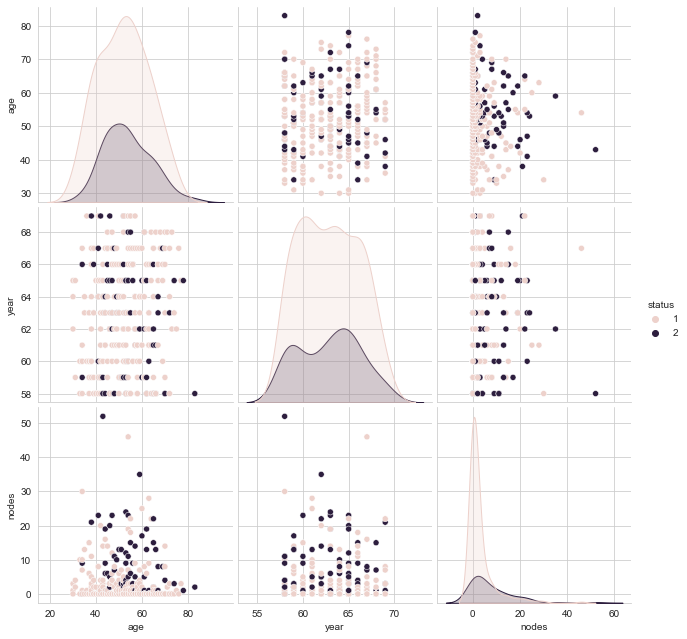

In [15]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", size=3);
plt.show()

In [ ]:
Observation
Looks like when no. of nodes are 0, or close to 0, the chances of survival for more than 5 years are high

In [18]:
haberman_status1 = haberman.loc[haberman.status == 1]
haberman_status2 = haberman.loc[haberman.status == 2]

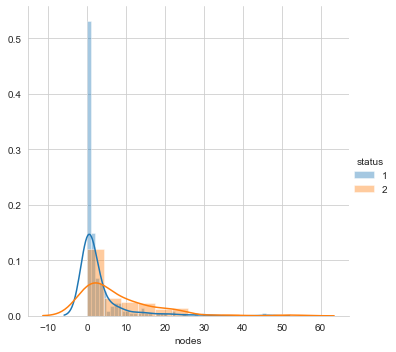

In [20]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

In [ ]:
Observation
Looks like when no. of nodes are 0, or close to 0, the chances of survival for more than 5 years are high and as no. of nodes increases there is lesser chance of survival for more than 5 years

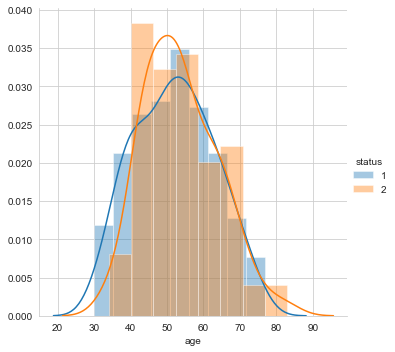

In [21]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

In [ ]:
Observation
Major overlap starts from age 35-75
Below age 35, chances of survival for more than 5 years are quite likely
Above 75, chances of survival after 5 years is very less

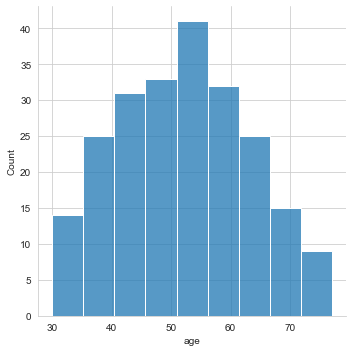

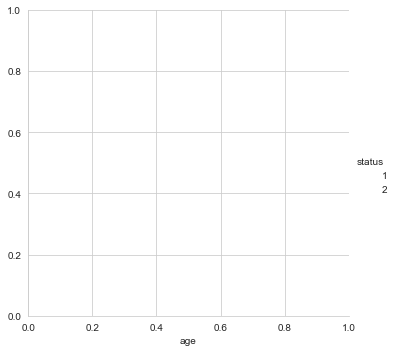

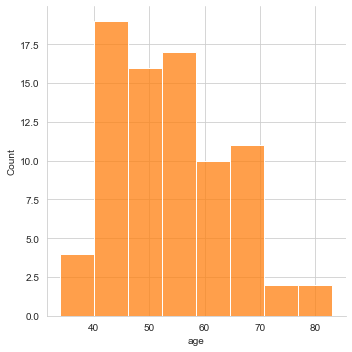

In [24]:
sns.FacetGrid(haberman, hue="status", size=5).map(sns.displot, "age").add_legend();

plt.show()

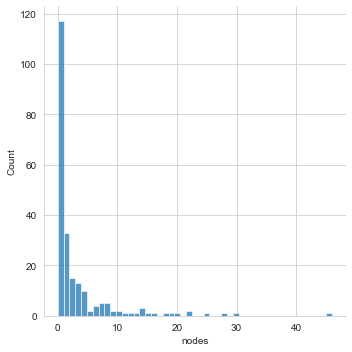

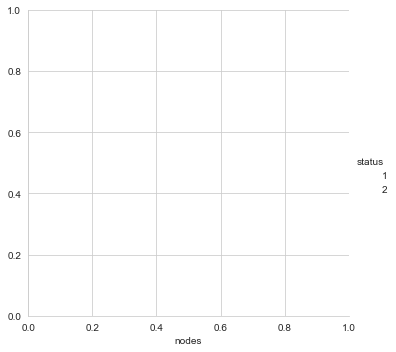

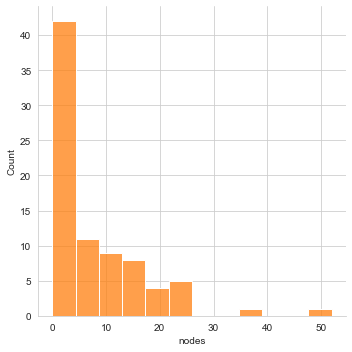

In [25]:
sns.FacetGrid(haberman, hue="status", size=5).map(sns.displot, "nodes").add_legend();

plt.show()

In [ ]:
Observation
For node = 0-10, there is higher rate of survival, more than 50% rate of survival, as no. of nodes increase, survival rate reduces

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


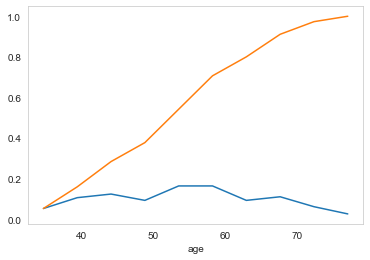

In [29]:
counts, bin_edges = np.histogram(haberman_status1["age"], bins=10, density=True)

pdf = counts/sum(counts)
# print(counts)
# print(sum(counts))
print(pdf)
print(bin_edges)

#compute cdf
cdf = np.cumsum(pdf) #cumulative sum (cdf)
plt.plot(bin_edges[1:],pdf) #plot pdf
plt.plot(bin_edges[1:],cdf) #plot cdf
plt.xlabel("age")
plt.grid()
plt.show()

In [ ]:
Observation: 
40% of the the total are below 50 years who survived for more than 5 years
70% of the the total are below 60 years who survived for more than 5 years
90% of the the total are below 70 years who survived for more than 5 years

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


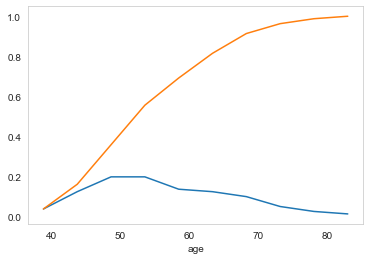

In [33]:
counts, bin_edges = np.histogram(haberman_status2["age"], bins=10, density=True)

pdf = counts/sum(counts)
# print(counts)
# print(sum(counts))
print(pdf)
print(bin_edges)

#compute cdf
cdf = np.cumsum(pdf) #cumulative sum (cdf)
plt.grid()
plt.plot(bin_edges[1:],pdf) #plot pdf
plt.plot(bin_edges[1:],cdf) #plot cdf
plt.xlabel("age")
plt.show()

In [ ]:
Observation
60% of the people above age 50 could not survive for 5 years
70% of the people above age 60 could not survive for 5 years

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


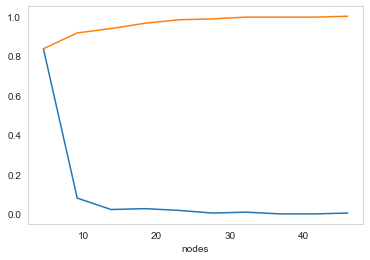

In [34]:
counts, bin_edges = np.histogram(haberman_status1["nodes"], bins=10, density=True)

pdf = counts/sum(counts)
# print(counts)
# print(sum(counts))
print(pdf)
print(bin_edges)

#compute cdf
cdf = np.cumsum(pdf) #cumulative sum (cdf)
plt.plot(bin_edges[1:],pdf) #plot pdf
plt.plot(bin_edges[1:],cdf) #plot cdf
plt.xlabel("nodes")
plt.grid()
plt.show()

In [ ]:
Observation
close to 85% who survived have nodes less than 10 nodes
85% of the total survived if nodes < 10

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


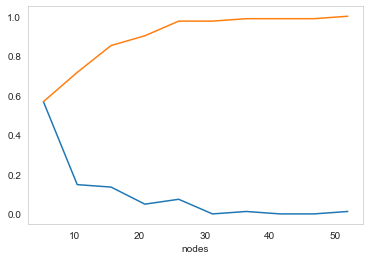

In [35]:
counts, bin_edges = np.histogram(haberman_status2["nodes"], bins=10, density=True)

pdf = counts/sum(counts)
# print(counts)
# print(sum(counts))
print(pdf)
print(bin_edges)

#compute cdf
cdf = np.cumsum(pdf) #cumulative sum (cdf)
plt.plot(bin_edges[1:],pdf) #plot pdf
plt.plot(bin_edges[1:],cdf) #plot cdf
plt.xlabel("nodes")
plt.grid()
plt.show()

In [ ]:
Observation
close to 65% people died who had less than 10 nodes
almost 100% people died who had more than 30 nodes

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


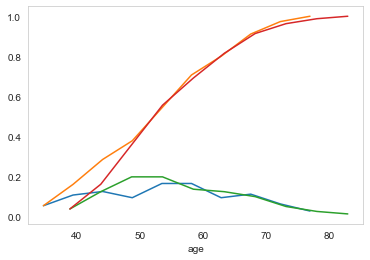

In [37]:
counts, bin_edges = np.histogram(haberman_status1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(haberman_status2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.grid()
plt.xlabel("age")
plt.show();

In [ ]:
if age < 40:
    "person survives more than 1 year"
if age > 40 and age <= 70:
    "major overlap, cant say"
if age > 70:
    "no survival chances"


No handles with labels found to put in legend.
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


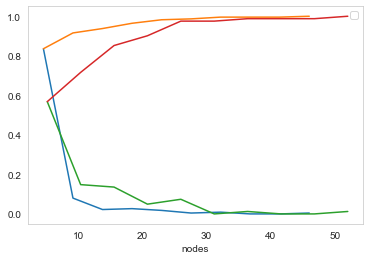

In [40]:
counts, bin_edges = np.histogram(haberman_status1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(haberman_status2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.grid()
plt.legend()
plt.xlabel("nodes")
plt.show();

In [ ]:
Observation
Major overlap
if nodes > 45:
    "not possible to survive"
if nodes < 45:
    "major overlap"

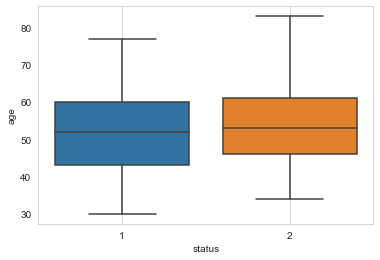

In [41]:
sns.boxplot(x='status',y='age', data=haberman)
plt.grid()
plt.show()

In [ ]:
Observation
Lot of overlap is observed

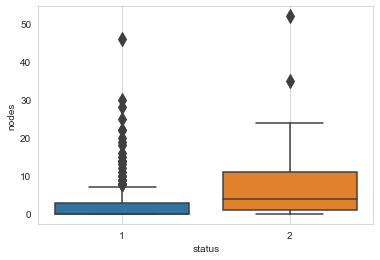

In [45]:
sns.boxplot(x='status',y='nodes', data=haberman, fliersize=10)
plt.grid()
plt.show()

In [ ]:
Observation
50% of the patients have nodes < = 3

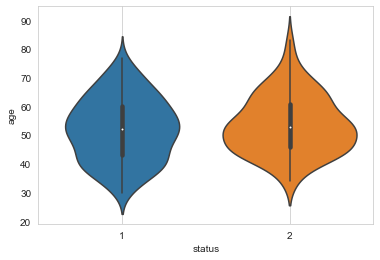

In [47]:
sns.violinplot(x='status',y='age', data=haberman, size=8)
plt.grid()
plt.show()

In [ ]:
#Lot of overlap is observed

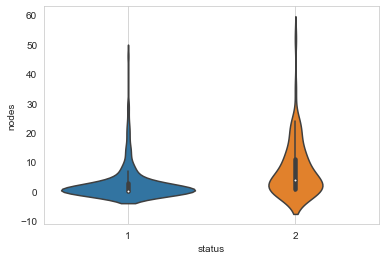

In [48]:
sns.violinplot(x='status',y='nodes', data=haberman, size=8)
plt.grid()
plt.show()

In [ ]:
Observation:
several surviving patients have nodes = 0
chances of death increases as nodes increase

In [ ]:
Final Conclusions

1. it is very difficult to predict survival on these 3 features, bcoz there is 85-95% overlap
2. All classes are lineraly inseperable
3. Need more features
4. Need to use non-linear models
5. nodes are a useful features
6. order of usefulness = nodes > age > year
7. year does not make sense to be added as a feature